# Introduction to Data Science

## Exercise # 01

#### Exercise is done in group with "Tariful Azam"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import geopandas as gpd
from shapely.geometry import Point
from pandas.api.types import CategoricalDtype
import unittest
%matplotlib inline

<h3> function "clean_brand": uniformats brand names </h3>

In [2]:
def clean_brand(brand_name):

    supermarkt_tankstelle={'Supermarkt Tankstelle',
                    'Supermarkt-Tankstelle',
                    'Supermarkt-Tankstelle am real- Markt'}

    frei = {'frei','freie Tankstelle','Freie','Freie Tankstelle'}

    raiffeisen = {'Raiffeisen','Raiffeisen Tankstelle'}

    shell= {'SB','SB Markt','SB-Markttankstelle','Shell'}

    bFT = {'Bft','bft','BFT'}

    total = {'TOTAL', 'Total'}

    auto_zotz = {'AUTO ZOTZ Landau in der Pfalz   Tanken und waschen',
                'AUTO ZOTZ Herxheim b.LD.       Tanken an L.493'}


    if brand_name in supermarkt_tankstelle:
        return 'Supermarkt Tankstelle'
    elif brand_name in frei:
        return 'Frei'
    elif brand_name in raiffeisen:
        return 'Raiffeisen'
    elif brand_name in shell:
        return 'Shell'
    elif brand_name in bFT:
        return 'BFT'
    elif brand_name in total:
        return 'Total'
    elif brand_name in auto_zotz:
        return 'Auto Zotz'
    else:
        return brand_name

    return 0


<h3> function "orderedTime": return the week days and month names in order </h3>

In [3]:
def orderedTime(arg=''):
    assert(arg=='day' or arg=='month'), "function : 'orderedTime', parameter : 'arg' can be 'day' or 'month' "
    
    if(arg=='day'):
        cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    elif(arg=='month'):
        cats = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July','August',
                        'September','October','November','December']
    else:
        return []

    return cats

<h3> function "customplot": plot the E5,E10 and Diesel price from the given data </h3>

In [4]:
def customPlot(df=object(),aGG=object()):
    
    fig,ax=plt.subplots(figsize=(10,10))
    df['E5'].agg(aGG).plot(ax=ax,kind='line',legend='E5')
    df['E10'].agg(aGG).plot(ax=ax,kind='line',legend='E10')
    df['DIESEL'].agg(aGG).plot(ax=ax,kind='line',legend='DIESEL')

    return 0

<h3>Test</h3>

test_clean_brand (__main__.TestNotebook) ... FAIL
test_customPlot (__main__.TestNotebook) ... ok
test_orderedTime (__main__.TestNotebook) ... ok

FAIL: test_clean_brand (__main__.TestNotebook)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-5-70828b850cdc>", line 4, in test_clean_brand
    self.assertIn(clean_brand('TOTAL'),['Aral','TOTAL','T'])
AssertionError: 'Total' not found in ['Aral', 'TOTAL', 'T']

----------------------------------------------------------------------
Ran 3 tests in 1.305s

FAILED (failures=1)


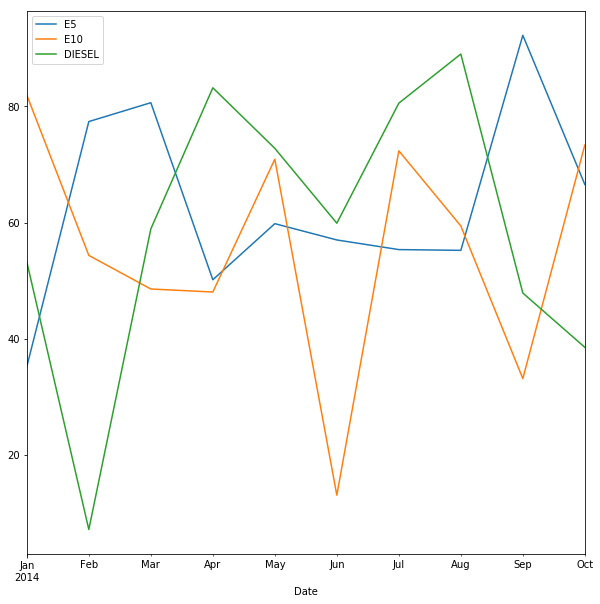

In [5]:
class TestNotebook(unittest.TestCase):
    
    def test_clean_brand(self):
        self.assertIn(clean_brand('TOTAL'),['Aral','TOTAL','T'])
    
    def test_orderedTime(self):
        self.assertIsInstance(orderedTime(arg='day'),list)
    
    def test_customPlot(self):
        data={'E5':np.random.uniform(low=1.00, high=100, size=(10,)),
             'E10':np.random.uniform(low=1.00, high=100, size=(10,)),
             'DIESEL':np.random.uniform(low=1.00, high=100, size=(10,)),
             'Date':pd.date_range('2014-01-01', periods=10, freq='M')}
        df=pd.DataFrame(data)
        df=df.groupby(['Date'])
        self.assertEqual(customPlot(df=df,aGG=np.min),0)

unittest.main(argv=[''],verbosity=2,exit=False)

### import "csv" files

In [6]:
data_price = pd.read_csv('example_sprit_cut_prices.csv',delimiter=';',parse_dates=['DATE_CHANGED'])
data_station=pd.read_csv('example_sprit_cut_station.csv',delimiter=';',parse_dates=['VERSION_TIME'])

### Summury: "data_station"

In [7]:
data_station.head()

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400


In [8]:
data_station.describe()

,VERSION,LAT,LNG
count,824.000000,824.000000,824.000000
mean,131.427184,49.322226,8.191227
std,269.682766,0.254722,0.283228
min,1.000000,48.800790,7.505350
25%,1.000000,49.106052,8.106655
50%,4.000000,49.374500,8.289707
75%,22.250000,49.509410,8.404923
max,881.000000,49.799397,8.499941


In [9]:
data_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 12 columns):
ID                           824 non-null object
VERSION                      824 non-null int64
VERSION_TIME                 824 non-null datetime64[ns]
NAME                         824 non-null object
BRAND                        802 non-null object
STREET                       820 non-null object
HOUSE_NUMBER                 674 non-null object
POST_CODE                    820 non-null object
PLACE                        820 non-null object
PUBLIC_HOLIDAY_IDENTIFIER    824 non-null object
LAT                          824 non-null float64
LNG                          824 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 77.3+ KB


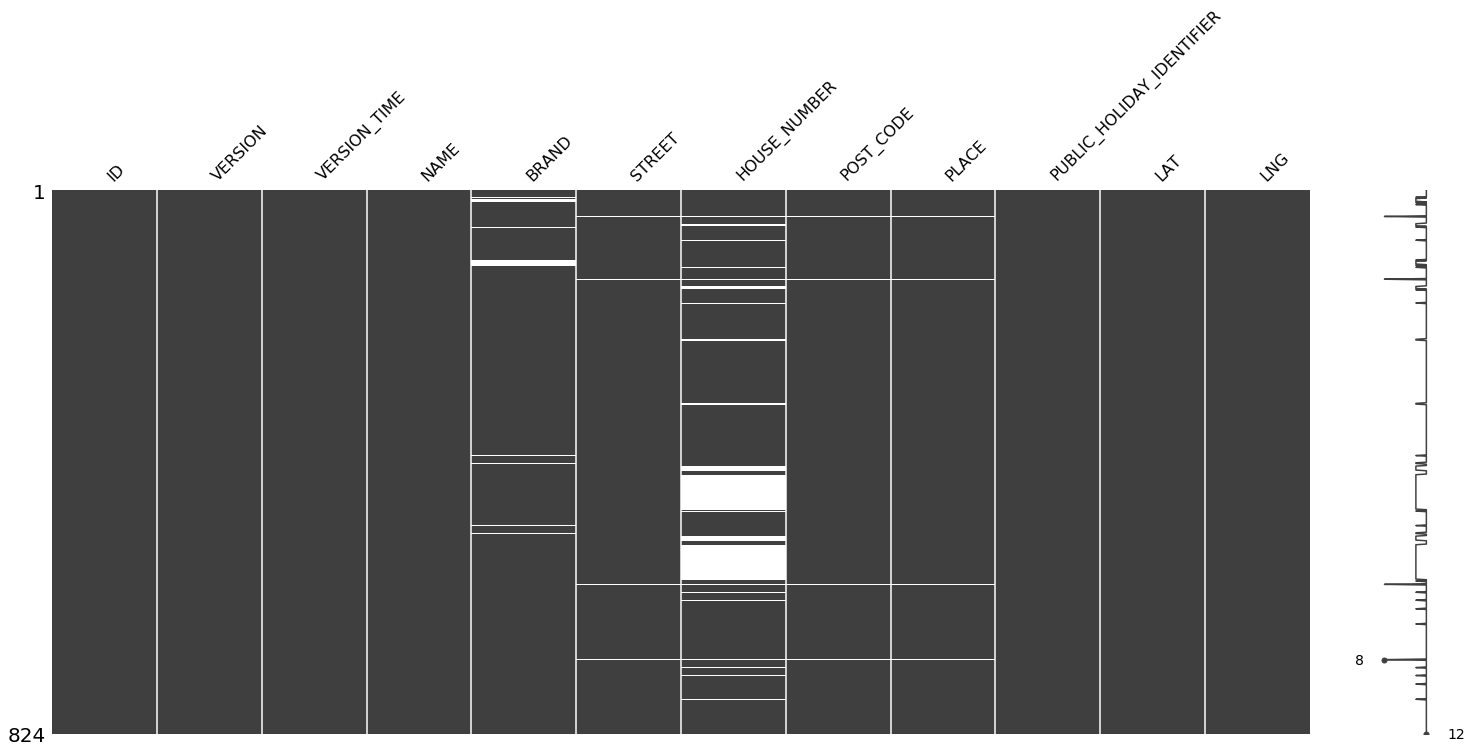

In [10]:
ms.matrix(data_station)

In [11]:
data_station_new = data_station.copy()
data_station_new['DATE'] = pd.to_datetime(data_station_new["VERSION_TIME"]).dt.date

<h3>clean data on "data_station_new"</h3>

In [12]:
data_station_new.drop('HOUSE_NUMBER',axis=1,inplace=True)
data_station_new.drop(data_station_new[data_station_new.BRAND=="nicht mehr aktiv"].index,inplace=True)
data_station_new.dropna(subset=['BRAND'],axis=0,inplace=True)
data_station_new.drop(data_station_new[data_station_new.BRAND=="\\N"].index,inplace=True)
data_station_new['BRAND'] = data_station_new['BRAND'].apply(clean_brand)

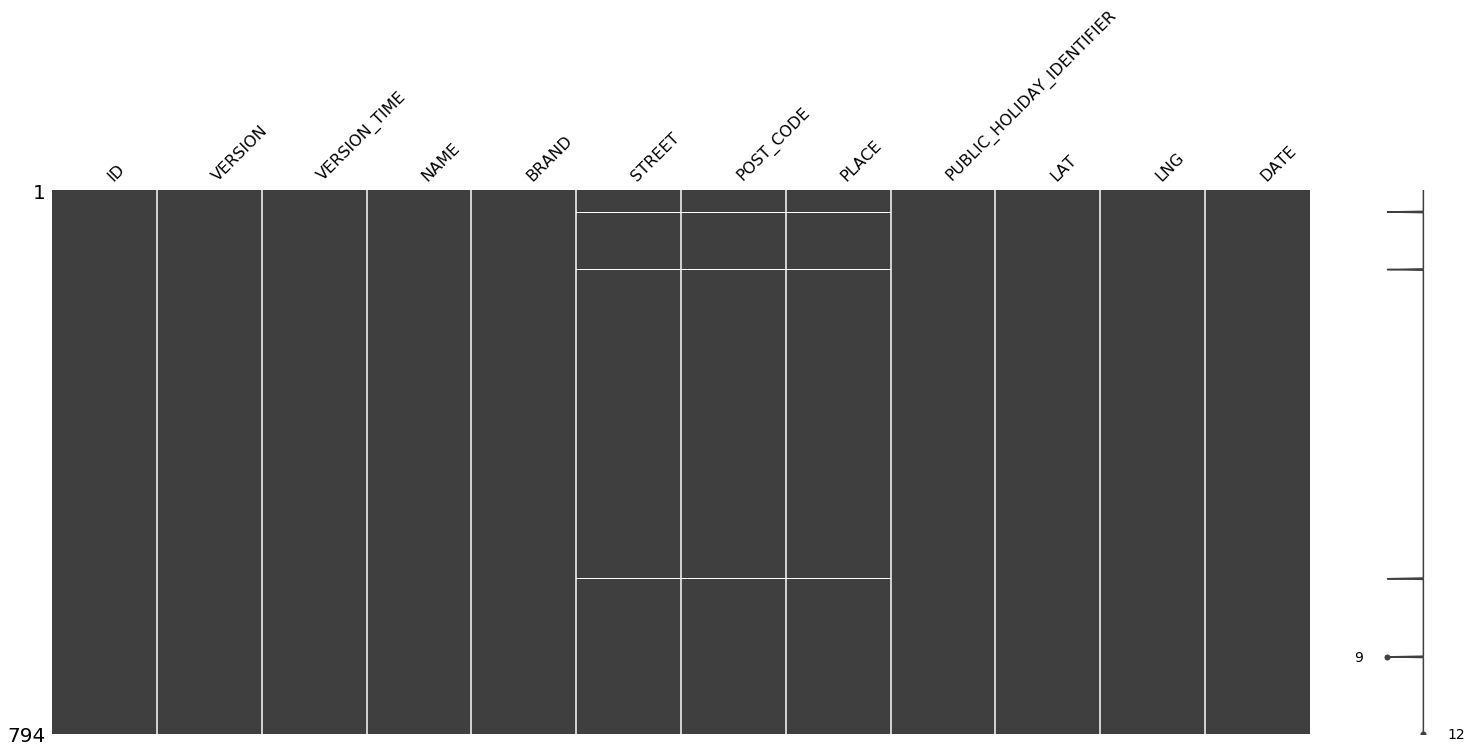

In [13]:
ms.matrix(data_station_new)

<h3>Summury: "data_price"</h3>

In [14]:
data_price.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01,21


In [15]:
data_price.describe()

,E5,E10,DIESEL,CHANGED
count,2.189526e+06,2.189526e+06,2.189526e+06,2.189526e+06
mean,1.434320e+03,1.404088e+03,1.247491e+03,1.871165e+01
std,2.091502e+02,2.116844e+02,1.037774e+02,8.031150e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00
25%,1.379000e+03,1.349000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.429000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.324000e+03,2.100000e+01
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01


In [16]:
data_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189526 entries, 0 to 2189525
Data columns (total 6 columns):
STID            object
E5              int64
E10             int64
DIESEL          int64
DATE_CHANGED    datetime64[ns]
CHANGED         int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 100.2+ MB


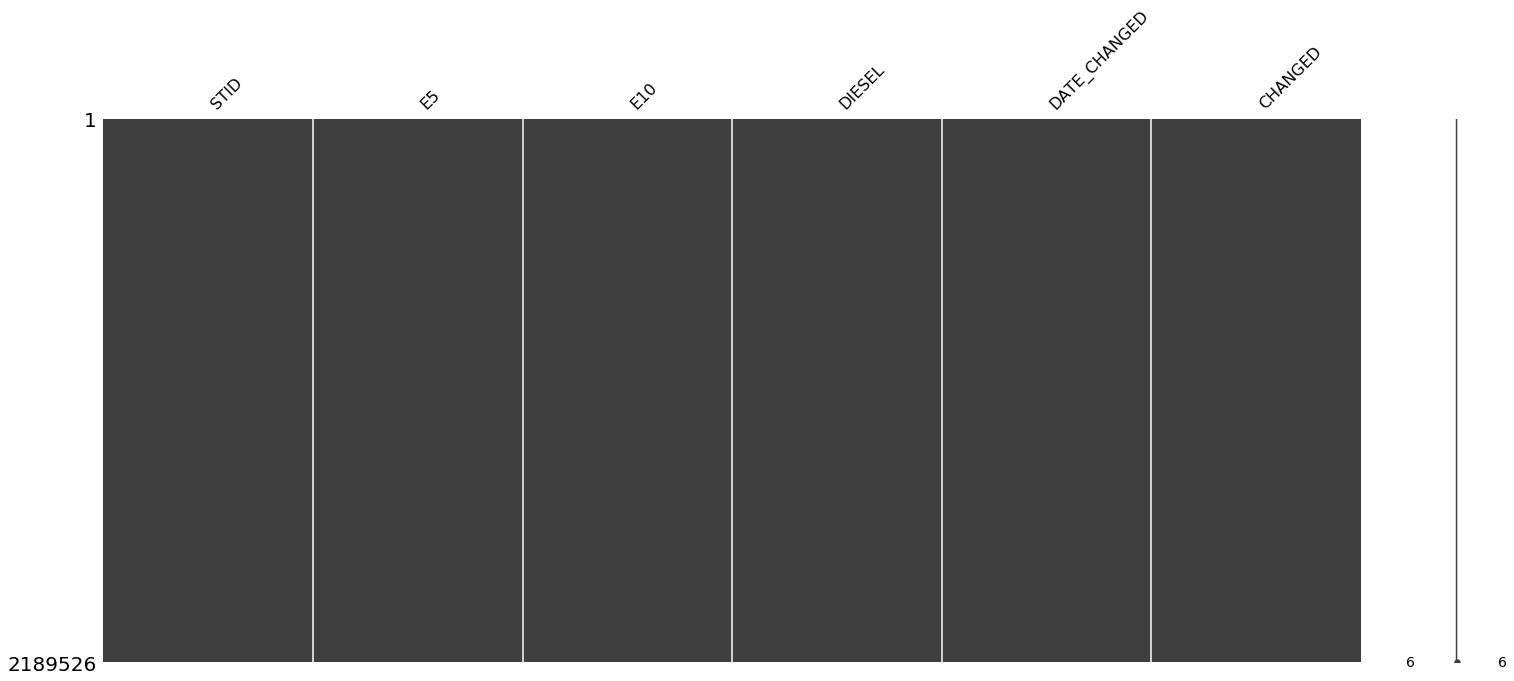

In [17]:
ms.matrix(data_price)

<h3> clean data on "data_price" </h3>

In [18]:
data_price.drop(data_price[data_price.DIESEL<=0].index,inplace=True)
data_price.drop(data_price[data_price.E5<=0].index,inplace=True)
data_price.drop(data_price[data_price.E10<=0].index,inplace=True)
data_price.describe()

,E5,E10,DIESEL,CHANGED
count,2.150850e+06,2.150850e+06,2.150850e+06,2.150850e+06
mean,1.457085e+03,1.429118e+03,1.247725e+03,1.900296e+01
std,1.045052e+02,9.922575e+01,1.024969e+02,7.726614e+00
min,8.000000e+00,1.000000e+03,9.990000e+02,1.000000e+00
25%,1.379000e+03,1.359000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.430000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.319000e+03,2.100000e+01
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01


In [19]:
data_price_new=data_price.copy()
data_price_new['DATE'] = pd.to_datetime(data_price_new["DATE_CHANGED"]).dt.date

<h6>Note: E5 has 2 values of Eur. 8.00 from STID = '7c5aca0f-b8e4-478e-9afb-46c2c136ae4e'
considering these 2 as wrong input and replacing this 2 values of 8 with mean value of E5 from same STID = '7c5aca0f-b8e4-478e-9afb-46c2c136ae4e' </h6>

In [20]:
e5_mean = data_price_new[(data_price_new.STID=='7c5aca0f-b8e4-478e-9afb-46c2c136ae4e')].E5.mean()
data_price_new.loc[data_price_new.E5 == 8,'E5']=e5_mean
data_price_new.describe()

,E5,E10,DIESEL,CHANGED
count,2.150850e+06,2.150850e+06,2.150850e+06,2.150850e+06
mean,1.457087e+03,1.429118e+03,1.247725e+03,1.900296e+01
std,1.044959e+02,9.922575e+01,1.024969e+02,7.726614e+00
min,1.000000e+03,1.000000e+03,9.990000e+02,1.000000e+00
25%,1.379000e+03,1.359000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.430000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.319000e+03,2.100000e+01
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01


### Question: 1

How	many different brands exist	in	the	data	set and	what	is	the	existing	history	
in	days	(bar	chart)?

<b>Answer: </b> 40 different brands exist in data set

In [21]:
brands=data_station_new.copy()
brands.sort_values(by=['DATE'],inplace=True)
brands=brands.groupby(['BRAND'])
brands.size()

BRAND
ARAL                           150
AVIA                            66
Agip                            34
Auto Zotz                        4
BFT                             50
CLASSIC                          2
E Center                         2
ED                               8
ELAN                             2
ESSO                            72
Eberhardt Jöhlingen              2
Frei                            20
Fritz Walter GmbH                2
Frühmesser GmbH                 12
HEM                             10
JET                             50
Markant                          2
Markenfreie TS                   2
Mr. Wash Autoservice AG          2
OIL!                            12
OMV                             20
Preis                            4
Raiffeisen                       4
Schiffer & Nicklaus GmbH         4
Schuster & Sohn KG               8
Sefrin Heizöl & Kraftstoffe      2
Shell                          124
Supermarkt Tankstelle           30
T             

In [22]:
brands.ngroups

40

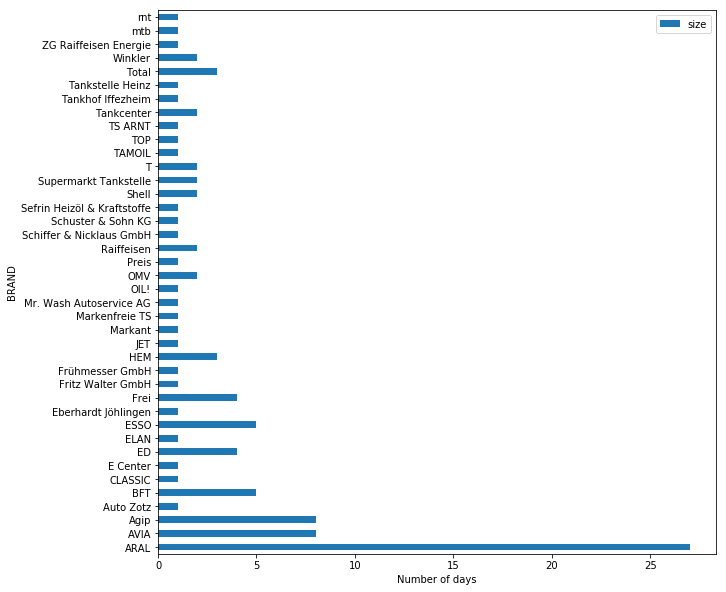

In [23]:
fig,ax=plt.subplots(figsize=(10,10))
ax.set_xlabel("Number of days")
brands.DATE.unique().agg([np.size]).plot(ax=ax,kind='barh')

<b> Figure: </b> existing	history	in	days	(bar	chart)

### Question: 2

What	is	the	min,	mean,	max	price	for	each	gasoline	type weekly	(time	series	
graph) ?

In [24]:
tmp=pd.DataFrame(data=data_price_new,columns=['DATE_CHANGED','DIESEL','E5','E10'])
tmp['day_of_week']=tmp['DATE_CHANGED'].dt.weekday_name #dt.weekday_name  or dt.dayofweek

cat_type = CategoricalDtype(categories=orderedTime(arg='day'), ordered=True)
tmp['day_of_week'] = tmp['day_of_week'].astype(cat_type)


tmp_groups=tmp.groupby(['day_of_week'])

0

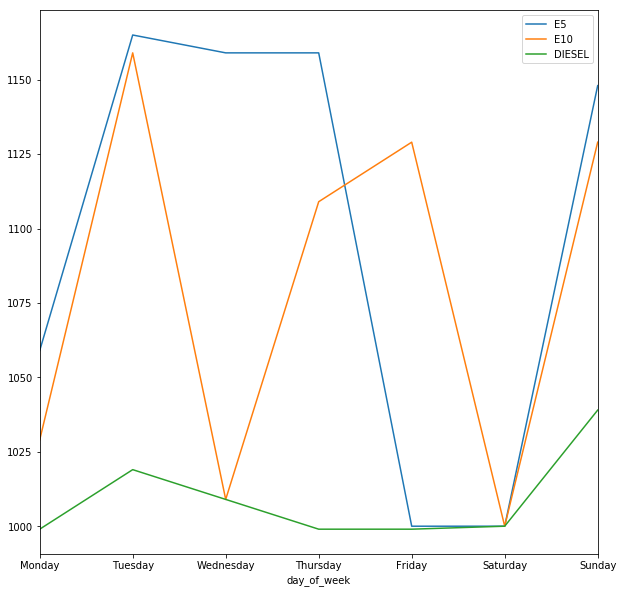

In [25]:
customPlot(df=tmp_groups,aGG=np.min)

<b>Figure: </b> min value of 3 gasolines in weekly time series

0

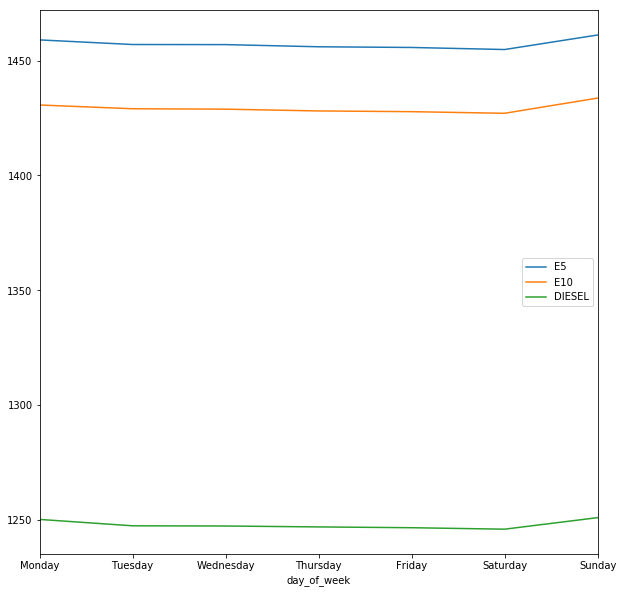

In [26]:
customPlot(df=tmp_groups,aGG=np.mean)

<b>Figure: </b> mean value of 3 gasoline types in weekly time series

0

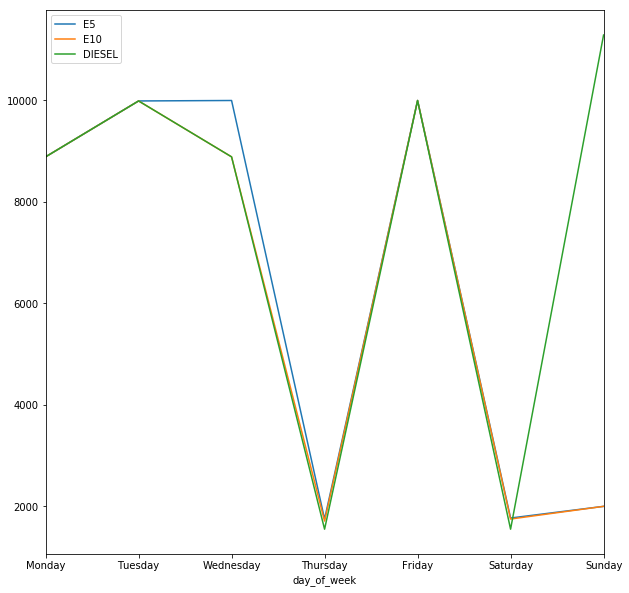

In [27]:
customPlot(df=tmp_groups,aGG=np.max)

<b>Figure:</b> max value of 3 gasoline types in weekly time series

As the minimum graph shows price of Diesel is the lowest and comparatively stable than E5 and E10 over the week. In Saturday, price of all 3 fuel types are same and also the lowest over the week. In case of E5, from Tuesday to Thursday the price is the highest of all 3 fuel types.

 As the average graph shows, over the week the average of 3 types of fuel does not flactuate. It also shows the cheapest price on Saturday.

 The maximum graph shows, except Sunday, the price of the fuels vary over the week in the more or less similar manner. In Thursday and Saturday the price are in its minimum peak where in Sunday the price of Diesel in its maximum peak.


### Question: 3

What	is	cheapest	station (in	average),	why	is	it	the	cheapest ?

<b>Answer: </b> As the following bar chart of average price of 3 gasoline types of each 40 gas stations show, Wikller is the cheapest station.

In [28]:
brands_=pd.DataFrame(data=data_station_new,columns=['BRAND','ID'])
brands_id=brands_.set_index(['ID']).to_dict()['BRAND']

In [29]:
brand_price=pd.DataFrame(data=data_price_new,columns=['STID','DIESEL','E10','E5'])
brand_price['BRAND']=brand_price['STID'].map(brands_id)

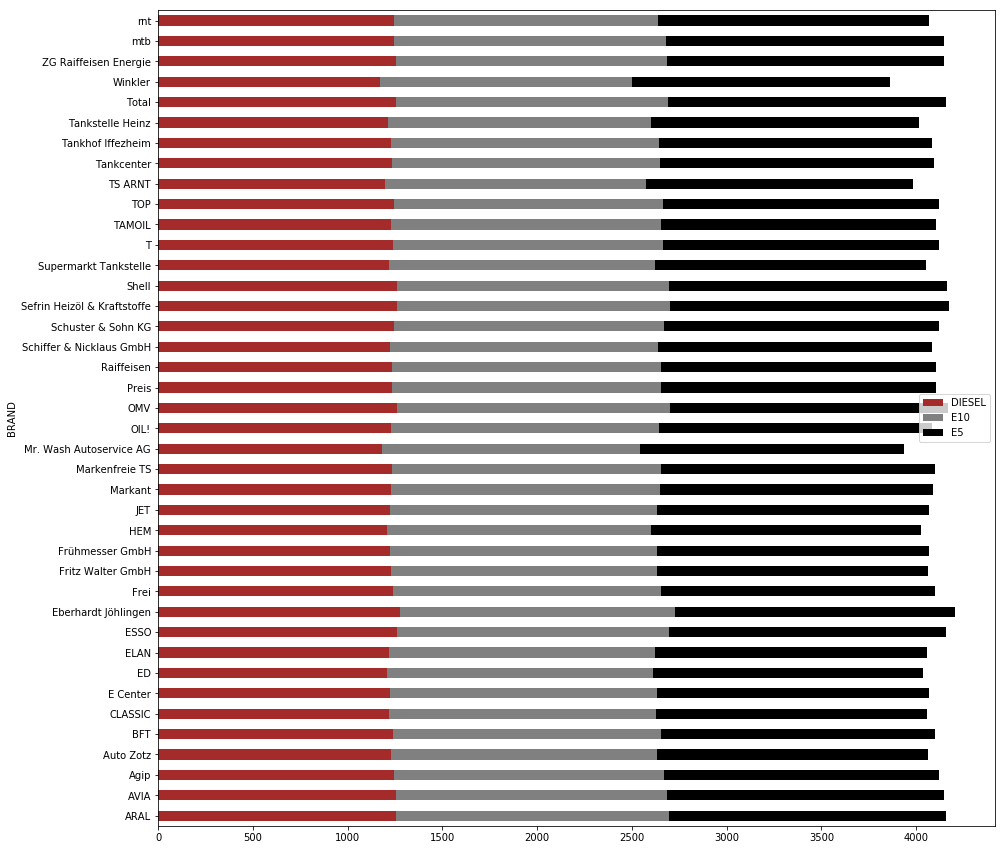

In [30]:
brand_price=brand_price.groupby(['BRAND']).agg(np.mean)
fig,ax=plt.subplots(figsize=(15,15))
brand_price.plot(ax=ax,kind='barh',stacked=True,color=['brown','gray','k'])

<b>Figure: </b> Brandwise average price of 3 gasoline types

### Question: 4

At	which	day	of a	weak	is	the	price	most	likely	the	cheapest (week	profile) ?

0

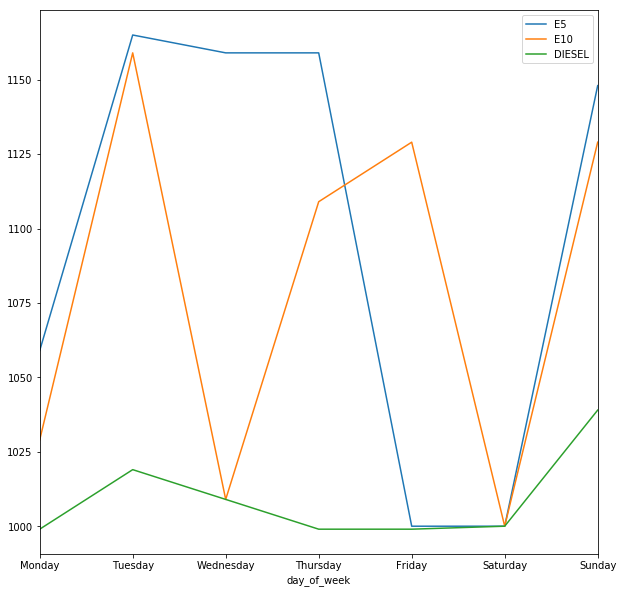

In [31]:
customPlot(df=tmp_groups,aGG=np.min)

<b>Figure: </b> min value of 3 gasolines in weekly time series

The figure shows, in Saturday the price is the most cheapest. 

0

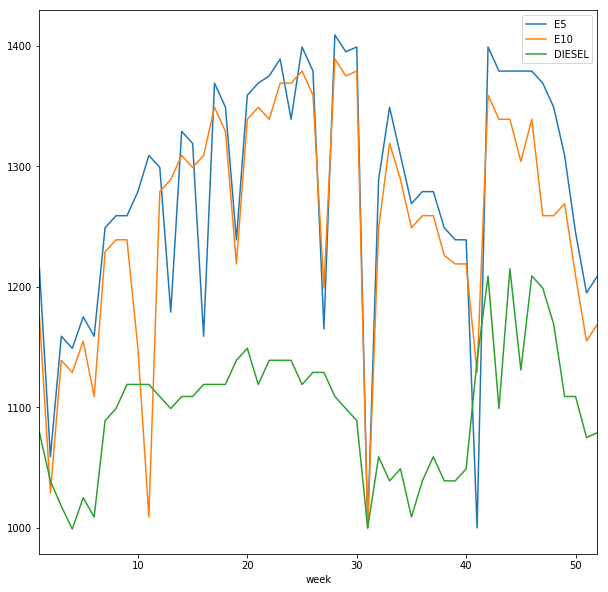

In [32]:
tmp=pd.DataFrame(data=data_price_new,columns=['DATE_CHANGED','DIESEL','E5','E10'])
tmp['week']=tmp['DATE_CHANGED'].dt.week #dt.weekday_name  or dt.dayofweek
tmp_groups=tmp.groupby(['week'])
customPlot(df=tmp_groups,aGG=np.min)

<b>Figure: </b> min value of 3 gasolines in weekly time series (over the year)

The figure shows, all 3 types of fuel have the minimum price during the 30th week of the year. Moreover, in the middle of 10th and 11th week the price of E10 falls again and same happens for E5 in 41th week of the year. 

In [33]:
tmp_groups.get_group(30)['DATE_CHANGED']

334       2015-07-20 13:58:01
335       2015-07-20 16:10:01
336       2015-07-21 12:22:01
337       2015-07-21 13:58:01
338       2015-07-21 14:42:01
339       2015-07-22 12:22:01
340       2015-07-24 06:22:01
341       2015-07-24 23:06:01
342       2015-07-25 06:22:01
343       2015-07-25 07:58:01
344       2015-07-25 23:14:01
345       2015-07-26 08:10:01
750       2015-07-20 14:14:01
751       2015-07-21 13:46:01
752       2015-07-22 12:02:01
753       2015-07-23 09:02:01
754       2015-07-23 10:26:01
755       2015-07-24 05:14:01
756       2015-07-24 08:10:01
757       2015-07-24 09:02:01
758       2015-07-24 09:10:01
759       2015-07-25 05:02:01
760       2015-07-25 08:58:01
761       2015-07-26 05:02:01
1007      2014-07-22 02:46:01
1008      2014-07-22 03:02:01
1009      2014-07-22 04:18:01
1010      2014-07-23 04:38:01
1011      2014-07-23 07:26:01
1012      2014-07-25 14:02:01
                  ...        
2188203   2015-07-23 07:54:01
2188458   2014-07-22 00:34:01
2188459   

### Question: 5

At	which	hour	during	a	day	is	the	price	the	cheapest	(hour	profile) ?

In [34]:
tmp_hour=data_price_new.copy()
tmp_hour['hour_of_day']=tmp_hour['DATE_CHANGED'].dt.hour


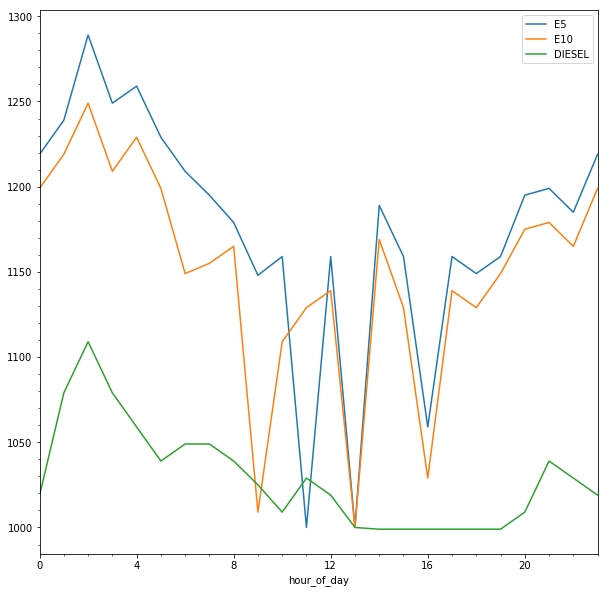

In [35]:
tmp_hour=tmp_hour.groupby(['hour_of_day'])
fig,ax=plt.subplots(figsize=(10,10))
ax.minorticks_on()
ax.set_xticks([i for i in range(0,25,4)])
tmp_hour['E5'].agg(np.min).plot(ax=ax,kind='line',legend='E5')
tmp_hour['E10'].agg(np.min).plot(ax=ax,kind='line',legend='E10')
tmp_hour['DIESEL'].agg(np.min).plot(ax=ax,kind='line',legend='DIESEL')

<b>Figure: </b> Minimum price of 3 gasoline types (hour profile)

<b>Answer: </b> The above figure shows, minimum price of E5 at 11:00 hour, E10 at 13:00 hour and Diesel in between 13:00 hour to 19:00 hour

### Question: 6

How	many	different	locations	are	present	in	the	data (visualize	via	a	map) ?

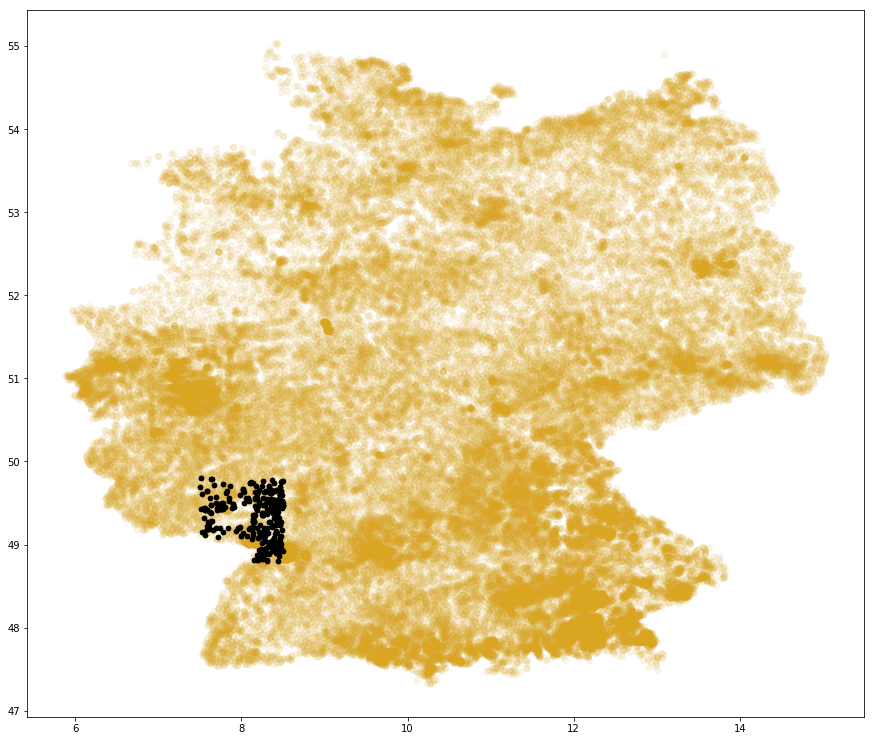

In [38]:
geom_data=gpd.read_file("places.shp")
# geom_data.plot(figsize=(15,15),color='grey')
# geom_data.head()
# geom_data.crs

geometry=[Point(i) for i in zip(data_station_new["LNG"],data_station_new["LAT"])]
geo_df=gpd.GeoDataFrame(data_station_new,crs=geom_data.crs,geometry=geometry)
# geo_df.head()
# geo_df.crs

fig,ax=plt.subplots(figsize=(15,15))
geom_data.plot(ax=ax,alpha=0.1,color='goldenrod')
geo_df.plot(ax=ax,markersize=20,color="k",marker="o")

<b> Figure: </b> location of fuel stations given in the dataset  

#### zoomed figure

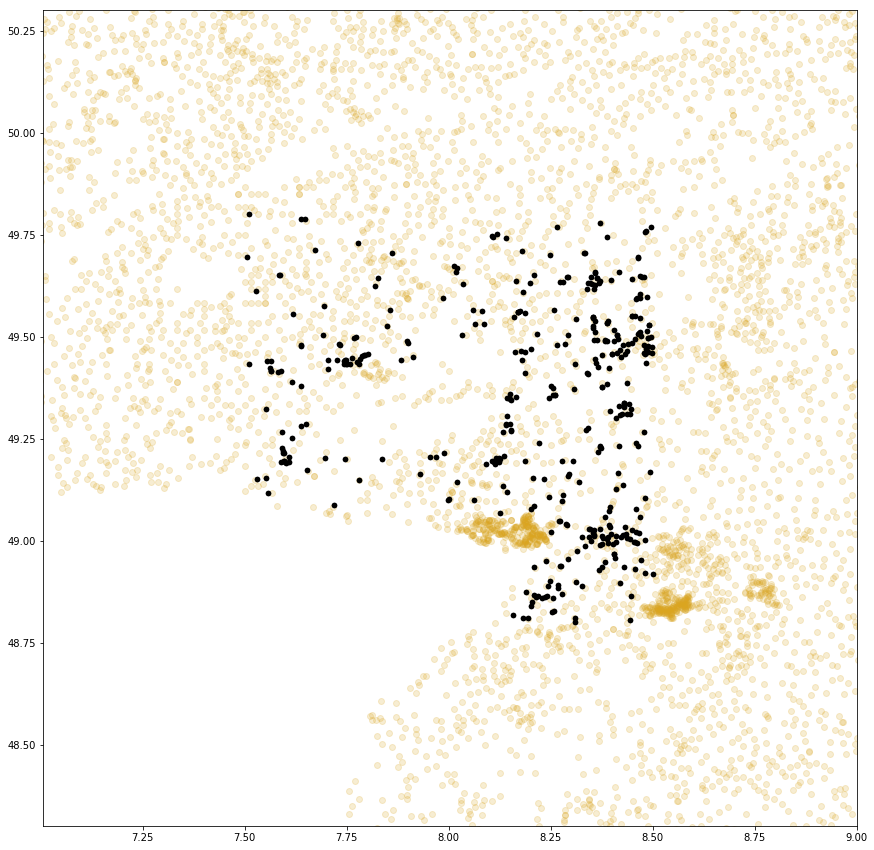

In [39]:
offset=0.5
minx, miny, maxx, maxy = geo_df.total_bounds

fig,ax=plt.subplots(figsize=(15,15))
ax.set_xlim(minx-offset, maxx+offset)
ax.set_ylim(miny-offset, maxy+offset)

geom_data.plot(ax=ax,alpha=0.2,color='goldenrod')
geo_df.plot(ax=ax,markersize=20,color="k",marker="o")

<b> Figure: </b> location of fuel stations given in the dataset  (zoomed)

#### Number of unique locations in numbers

In [40]:
geometries=geo_df['geometry'].apply(lambda x: x.wkt).values
len(set(geometries))

395

### Question: 7

What	is	the	gas	station	which	has	most	price	data	points,	choose	one	and	draw the	time	series for	all	3	gas	types ?

In [41]:
frequent_gas_station=data_price_new.copy()
frequent_gas_station.head()
frequent_gas_station=frequent_gas_station.groupby('STID')
# sorted_frequency=frequent_gas_station.size().sort_values() //validating code
id_sorted_frequency=frequent_gas_station.size().idxmax()

<b>Answer: </b> most frequent gas station (brand)  --

In [42]:
id_sorted_frequency

'5374ea5c-bf3e-4b0a-8504-049368adcdba'

In [43]:
data_station_new[data_station_new.ID==id_sorted_frequency].BRAND

64     AVIA
159    AVIA
Name: BRAND, dtype: object

#### time series graph

In [44]:
avia_data=pd.DataFrame(data=data_price_new[data_price_new['STID']==id_sorted_frequency])

<h5>Monthly</h5>

0

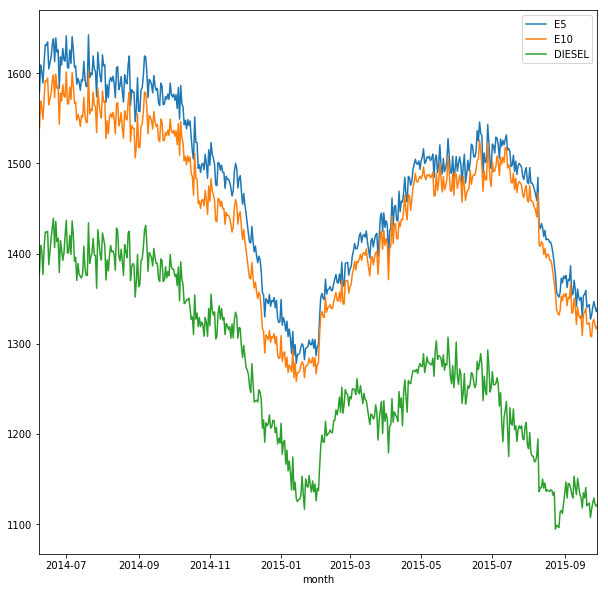

In [45]:
tmp_month=avia_data.copy()
tmp_month['month']=tmp_month['DATE_CHANGED'].dt.date
tmp_groups=tmp_month.groupby(['month'])

customPlot(df=tmp_groups,aGG=np.mean)

<b>Figure: </b> The average price of 3 gasoline types of AVAIA over the dataset time period (monthly)

<h5>Monthwise</h5>

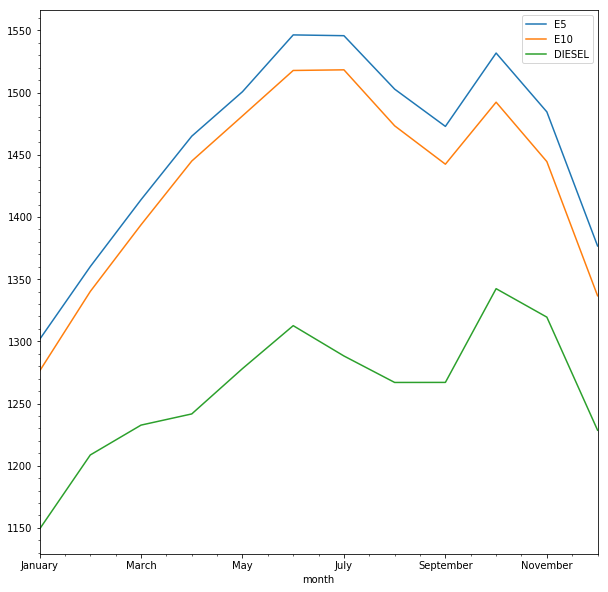

In [46]:
tmp_month=avia_data.copy()
tmp_month['month']=tmp_month['DATE_CHANGED'].dt.month_name()

cat_type = CategoricalDtype(categories=orderedTime(arg='month'), ordered=True)
tmp_month['month'] = tmp_month['month'].astype(cat_type)

tmp_groups=tmp_month.groupby(['month'])

fig,ax=plt.subplots(figsize=(10,10))
ax.minorticks_on()
tmp_groups['E5'].agg(np.mean).plot(ax=ax,kind='line',legend='E5')
tmp_groups['E10'].agg(np.mean).plot(ax=ax,kind='line',legend='E10')
tmp_groups['DIESEL'].agg(np.mean).plot(ax=ax,kind='line',legend='DIESEL')

<b>Figure: </b> The average price of 3 gasoline types of AVAIA over the dataset time period (mothwise)

<h5>Weekly</h5>

0

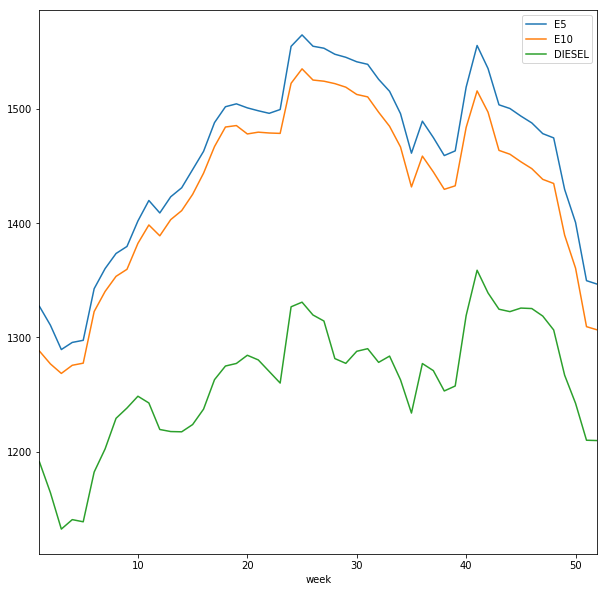

In [47]:
tmp_week=avia_data.copy()
tmp_week['week']=tmp_week['DATE_CHANGED'].dt.week

tmp_groups=tmp_week.groupby(['week'])
customPlot(df=tmp_groups,aGG=np.mean)

<h5>Weekwise</h5>

0

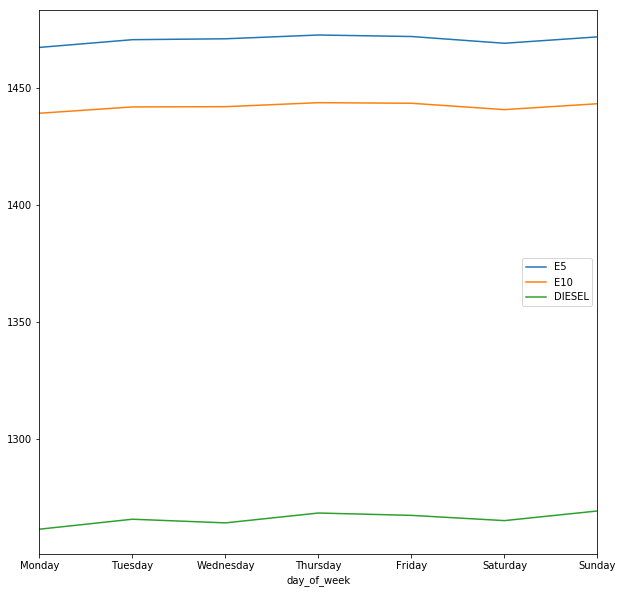

In [48]:
tmp_week=avia_data.copy()
tmp_week['day_of_week']=tmp_week['DATE_CHANGED'].dt.weekday_name

cat_type = CategoricalDtype(categories=orderedTime(arg='day'), ordered=True)
tmp_week['day_of_week'] = tmp_week['day_of_week'].astype(cat_type)

tmp_groups=tmp_week.groupby(['day_of_week'])
customPlot(df=tmp_groups,aGG=np.mean)


<b>Figure: </b> The average price of 3 gasoline types of AVAIA over the dataset time period (weekly)

<h5>Hourly</h5>

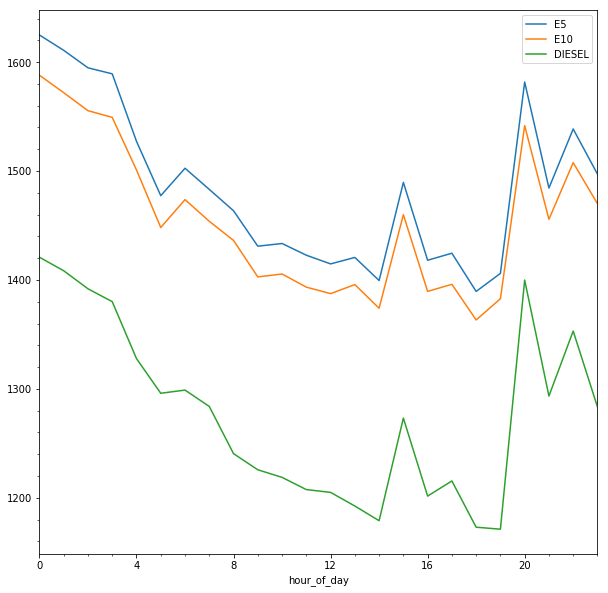

In [49]:
tmp_hour=avia_data.copy()
tmp_hour['hour_of_day']=tmp_hour['DATE_CHANGED'].dt.hour
tmp_groups=tmp_hour.groupby(['hour_of_day'])

fig,ax=plt.subplots(figsize=(10,10))
ax.set_xticks([i for i in range(0,25,4)])
ax.minorticks_on()
tmp_groups['E5'].agg(np.mean).plot(ax=ax,kind='line',legend='E5')
tmp_groups['E10'].agg(np.mean).plot(ax=ax,kind='line',legend='E10')
tmp_groups['DIESEL'].agg(np.mean).plot(ax=ax,kind='line',legend='DIESEL')

<b>Figure: </b> The average price of 3 gasoline types of AVAIA over the dataset time period (hourly)

### Question: 8

At	which	hour	during	a	day	do	we	have	the	most	price	changes ?

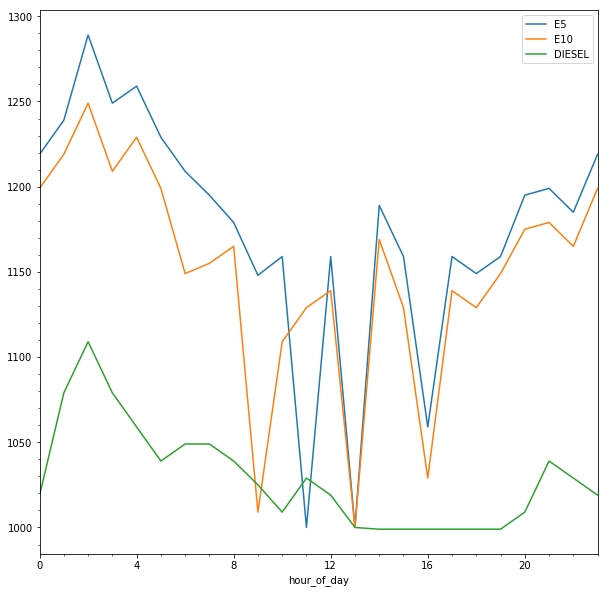

In [50]:
tmp_hour=data_price_new.copy()
tmp_hour['hour_of_day']=tmp_hour['DATE_CHANGED'].dt.hour
tmp_hour=tmp_hour.groupby(['hour_of_day'])
fig,ax=plt.subplots(figsize=(10,10))
ax.minorticks_on()
ax.set_xticks([i for i in range(0,25,4)])
tmp_hour['E5'].agg(np.min).plot(ax=ax,kind='line',legend='E5')
tmp_hour['E10'].agg(np.min).plot(ax=ax,kind='line',legend='E10')
tmp_hour['DIESEL'].agg(np.min).plot(ax=ax,kind='line',legend='DIESEL')

### Question: 9

Select	20	gas	stations	having	the	longest	time	history	and	visualize	the	average	price	per	month.	Use	heatmap and	only	the	prices	between	12:00-13:00 of	e10 and	diesel

In [51]:
brands_=pd.DataFrame(data=data_station_new,columns=['VERSION_TIME','BRAND','ID'])
brands_id=brands_.set_index(['ID']).to_dict()['BRAND']
brands_.sort_values(by=['VERSION_TIME'],inplace=True)
brands_202=brands_.groupby(['BRAND']).first().nsmallest(20,['VERSION_TIME'])

In [52]:
brand_20_price=pd.DataFrame(data=data_price_new,columns=['STID','E10','DIESEL','DATE_CHANGED'])
brand_20_price['hour']=brand_20_price['DATE_CHANGED'].dt.hour
brand_20_price['month']=brand_20_price['DATE_CHANGED'].dt.month_name()
brand_20_price['BRAND']=brand_20_price['STID'].map(brands_id)

In [53]:
brand_20_price=brand_20_price[brand_20_price['hour'].isin([12,13])]
brand_20_price=brand_20_price[brand_20_price['BRAND'].isin(brands_202.index.values)]

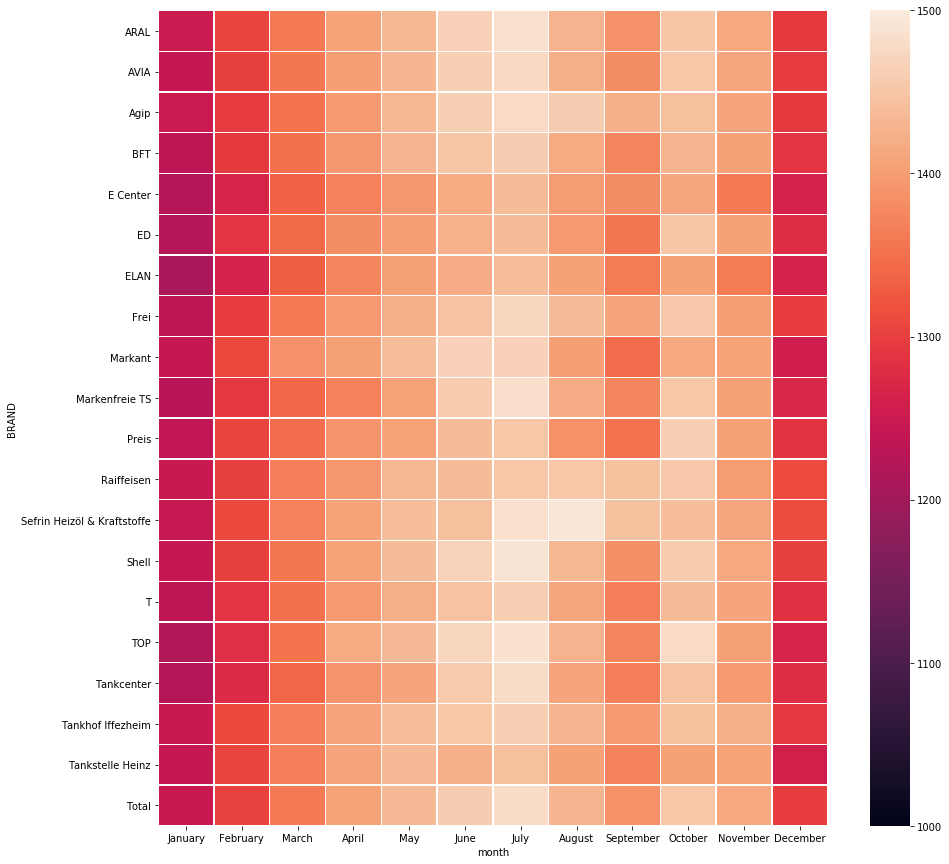

In [54]:
e10=pd.DataFrame(data=brand_20_price,columns=['BRAND','month','E10'])

cat_type = CategoricalDtype(categories=orderedTime(arg='month'), ordered=True)
e10['month'] = e10['month'].astype(cat_type)

e10=e10.groupby(['BRAND','month'])['E10'].mean().to_frame().reset_index()
df=e10.pivot_table(index='BRAND',columns='month',values='E10')
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df,ax=ax,vmin=1000,vmax=1500, fmt=".2f",linewidths=.3)


The graph shows in July the price of E10 is the highest and in January the price is the lowest.

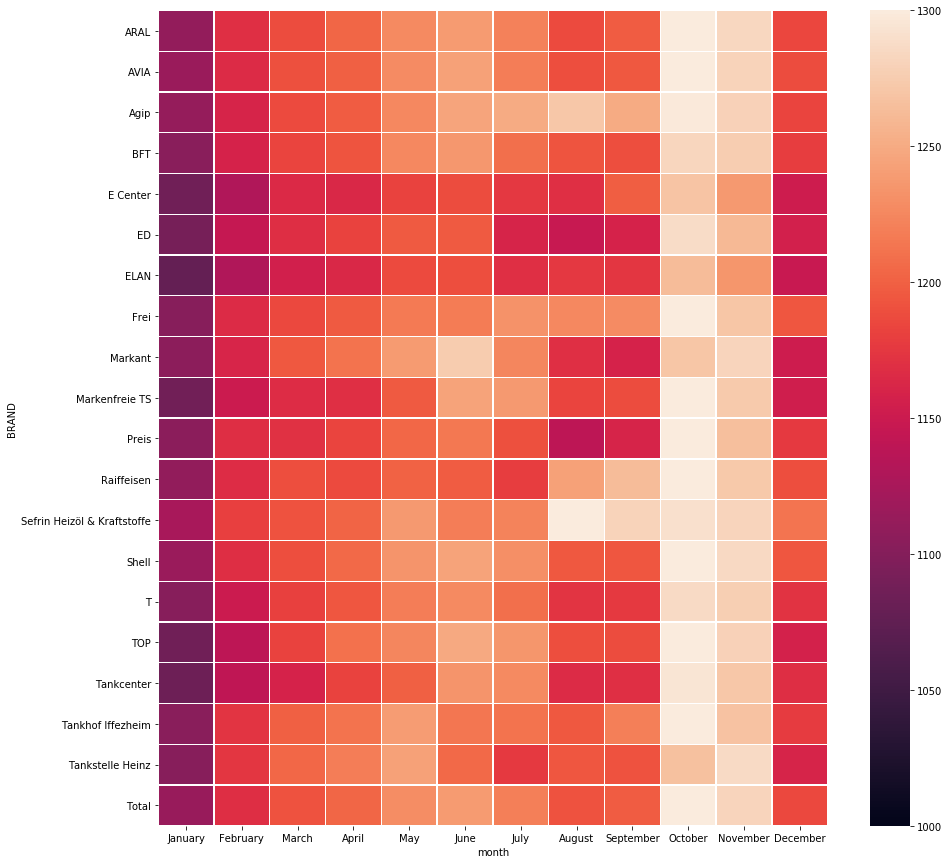

In [55]:
diesel=pd.DataFrame(data=brand_20_price,columns=['BRAND','month','DIESEL'])

cat_type = CategoricalDtype(categories=orderedTime(arg='month'), ordered=True)
diesel['month'] = diesel['month'].astype(cat_type)

diesel=diesel.groupby(['BRAND','month'])['DIESEL'].mean().to_frame().reset_index()
df=diesel.pivot_table(index='BRAND',columns='month',values='DIESEL')
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df,ax=ax,vmin=1000,vmax=1300, fmt=".2f",linewidths=.3)

The graph shows in October the price of Diesel is the highest and in January the price is the lowest.

### Question: 10

Describe	a	possible	business	potential in	€ for	the	customer

<b>Answer:</b>  Follwing observations can be made from the above figures:
1. In daily basis E5 will have the most likely lowest price at 11:00 hour,  E10 at 13:00 hour and Diesel in between 13:00 hour to 19:00 hour
2. In weekly basis, Saturday is the most cheapest day 
3. In monthly basis, from December to January the price of Diesel and E10 will most likely be the cheapest cheapest.